# Lecture 3 - Generalization

The fundamental issue in machine learning is the tension between *optimization* and *generalization*. *Optimization* refers to the process of adjusting a model to get the best performance possible on the training data, whereas *generalization* refers to how well the trained model performs on data it has never seen before. The purpose of a machine learning model is to get good generalization. If we fit the model to its training data too well, overfitting kicks in and generalization suffers.

<img src=1.png/>

At the beginning of training, optimization and generalization are correlated: the lower the loss on training data, the lower the loss on test data. While this is happening, a model is said to be underfit: there is still progress to be made. But after a certain number of iterations on the training data, generalization stops improving, validation metrics stall and then begin to degrade: the model is starting to overfit. Overfitting is particularly likely to occur when our data is noisy, if it involves uncertainty, or if it includes rare features.

To illustrate this phenomenon let's consider the following example:

In [2]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 28**2))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 28**2))], axis=1)

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

In [7]:
def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)



Epoch 1/10


375/375 [==============================] - 4s 9ms/step - loss: 0.6194 - accuracy: 0.8084 - val_loss: 0.2961 - val_accuracy: 0.9075
Epoch 2/10
375/375 [==============================] - 3s 7ms/step - loss: 0.2545 - accuracy: 0.9204 - val_loss: 0.1879 - val_accuracy: 0.9425
Epoch 3/10
375/375 [==============================] - 3s 7ms/step - loss: 0.1644 - accuracy: 0.9492 - val_loss: 0.1456 - val_accuracy: 0.9564
Epoch 4/10
375/375 [==============================] - 3s 7ms/step - loss: 0.1168 - accuracy: 0.9641 - val_loss: 0.1264 - val_accuracy: 0.9619
Epoch 5/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0857 - accuracy: 0.9729 - val_loss: 0.1803 - val_accuracy: 0.9446
Epoch 6/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0652 - accuracy: 0.9795 - val_loss: 0.1622 - val_accuracy: 0.9535
Epoch 7/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0454 - accuracy: 0.9852 - val_loss: 0.1328 - val_accuracy: 0.9647
Ep

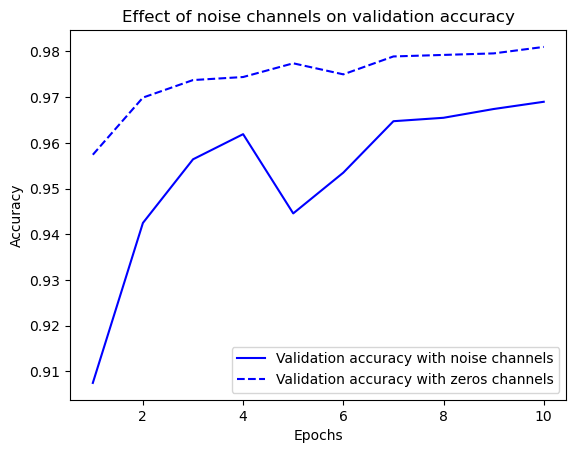

In [8]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

The following example shows that deep learning models can be trained to fit anything, as long as they have enough representational power.

In [10]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 5ms/step - loss: 2.3158 - accuracy: 0.1024 - val_loss: 2.3044 - val_accuracy: 0.1051
Epoch 2/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2989 - accuracy: 0.1170 - val_loss: 2.3116 - val_accuracy: 0.1054
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2909 - accuracy: 0.1267 - val_loss: 2.3189 - val_accuracy: 0.0983
Epoch 4/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2798 - accuracy: 0.1374 - val_loss: 2.3225 - val_accuracy: 0.1012
Epoch 5/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2634 - accuracy: 0.1523 - val_loss: 2.3416 - val_accuracy: 0.0957
Epoch 6/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2447 - accuracy: 0.1645 - val_loss: 2.3512 - val_accuracy: 0.0959
Epoch 7/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2234 - accuracy: 0.1805 - val_loss: 2.3627 - val_accuracy: 0.1023

Epoch 58/100
375/375 [==============================] - 2s 5ms/step - loss: 0.7830 - accuracy: 0.7452 - val_loss: 4.9398 - val_accuracy: 0.0993
Epoch 59/100
375/375 [==============================] - 2s 5ms/step - loss: 0.7667 - accuracy: 0.7509 - val_loss: 5.0345 - val_accuracy: 0.0986
Epoch 60/100
375/375 [==============================] - 2s 5ms/step - loss: 0.7528 - accuracy: 0.7554 - val_loss: 5.0473 - val_accuracy: 0.0964
Epoch 61/100
375/375 [==============================] - 2s 5ms/step - loss: 0.7380 - accuracy: 0.7615 - val_loss: 5.1380 - val_accuracy: 0.0913
Epoch 62/100
375/375 [==============================] - 2s 5ms/step - loss: 0.7220 - accuracy: 0.7682 - val_loss: 5.2061 - val_accuracy: 0.0922
Epoch 63/100
375/375 [==============================] - 2s 5ms/step - loss: 0.7073 - accuracy: 0.7715 - val_loss: 5.2780 - val_accuracy: 0.0947
Epoch 64/100
375/375 [==============================] - 2s 5ms/step - loss: 0.6947 - accuracy: 0.7739 - val_loss: 5.3812 - val_accuracy:

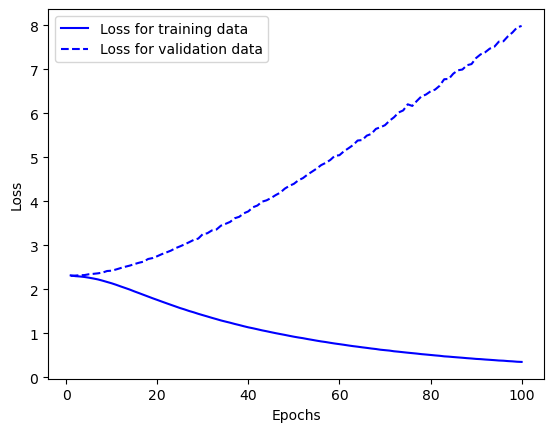

In [14]:
epochs = range(1, 101)
loss = history.history["loss"]
val_loss = history.history["val_loss"]

plt.plot(epochs, loss, "b-",
         label="Loss for training data")
plt.plot(epochs, val_loss, "b--",
         label="Loss for validation data")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

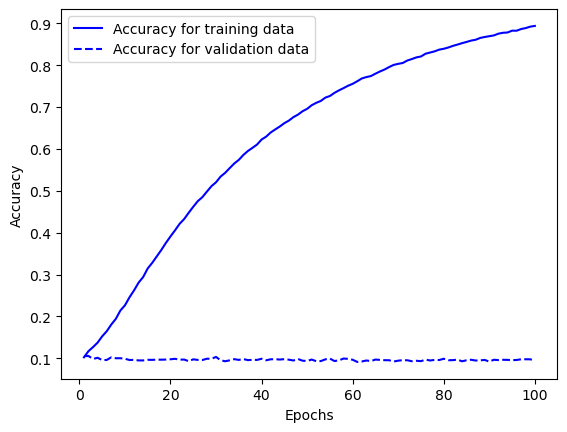

In [15]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
plt.plot(epochs, accuracy, "b-",
         label="Accuracy for training data")
plt.plot(epochs, val_accuracy, "b--",
         label="Accuracy for validation data")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

It turns out, the nature of generalization in deep learning has rather little to do with deep learning models themselves, and much to do with the structure of information in the real world. The *manifold hypothesis* posits that all natural data lies on a low-dimensional manifold within the high-dimensional space where it is encoded. The manifold hypothesis implies that
- Machine learning models only have to fit relatively simple, low-dimensional, highly structured subspaces within their potential input space (latent manifolds).
- Within one of these manifolds, it’s always possible to interpolate between two inputs, that is to say, morph one into another via a continuous path along which all points fall on the manifold.

The ability to interpolate between samples is the key to understanding generalization in deep learning since we can start making sense of points we’ve never seen before by relating them to other points that lie close on the manifold. Humans are capable of extreme generalization, which is enabled by cognitive mechanisms other than interpolation: abstraction, symbolic models of the world, reasoning, logic, common sense, innate priors about the world, and pattern recognition.

## Training data suitable for generalization
We’ll only be able to generalize if our data forms a manifold where points can be interpolated. The more informative and the less noisy features are, the more suitable to generalize. Model needs to be trained on a dense sampling of its input space. A “dense sampling” in this context means that the training data should densely cover the entirety of the input data manifold.

<img src=2.png/>

Summing up, we should always keep in mind that the best way to improve a deep learning model is to train it on more data or better data. When getting more data isn’t possible, the next best solution is to modulate the quantity of information that the model is allowed to store, or to add constraints on the smoothness of the model curve.

## Measuring the generalization - evaluating DL models
Since our goal is to develop models that can successfully generalize to new data, it’s essential to be able to reliably measure the generalization power of models.
Evaluating a model always boils down to splitting the available data into three sets: 
- training
- validation 
- test

We train on the training data and evaluate our model on the validation data. Once our model is ready for prime time, we test it one final time on the test data. We need to split data into these 3 sets since developing a model always involves tuning its configuration (choosing the number of layers or the size of the layers). We do this tuning by using as a feedback signal the performance of the model on the validation data. As a result, tuning the configuration of the model based on its performance on the validation set can quickly result in overfitting to the validation set. Therefore we care about performance on completely new data, not on the validation data, so we need to use the test dataset. 
There are 3 common ways to split data into training, validation, and test sets:
- simple holdout validation, 
- K-fold validation, 
- iterated K-fold validation with shuffling

### Simple holdout validation
We set apart some fraction of our data as our test set, train on the remaining data, and evaluate on the test set.

<img src=3.png/>

```python
# num_validation_samples is some fraction of len(data), usually 0.2-0.3
num_validation_samples = 0.2
np.random.shuffle(data)                                   
validation_data = data[:num_validation_samples]           
training_data = data[num_validation_samples:]             
model = get_model()                                       
model.fit(training_data, ...)                             
validation_score = model.evaluate(validation_data, ...)    
model = get_model()                                       
model.fit(np.concatenate([training_data, validation_data]), ...)         
test_score = model.evaluate(test_data, ...) 
```

The simple holdout validation suffers from one flaw: if little data is available, then our validation and test sets may contain too few samples to be statistically representative of the data at hand. Therefore (iterated) $K$-fold validation was invented

### K-fold validation
We split our data into $K$ partitions of equal size. For each partition $i$, train a model on the remaining $K - 1$ partitions, and evaluate it on partition $i$. Our final score is then the averages of the $K$ scores obtained.

<img src=4.png/>

```python
num_validation_samples = len(data) // k
np.random.shuffle(data)
validation_scores = [] 
for fold in range(k):
    validation_data = data[num_validation_samples * fold: num_validation_samples * (fold + 1)] 
    training_data = np.concatenate( data[:num_validation_samples * fold], data[num_validation_samples * (fold + 1):])           
    model = get_model()                                          
    model.fit(training_data, ...)
    validation_score = model.evaluate(validation_data, ...)
    validation_scores.append(validation_score)
validation_score = np.average(validation_scores)                 
model = get_model()                                              
model.fit(data, ...)                                             
test_score = model.evaluate(test_data, ...) 
```

### Iterated K-fold validation with shuffling
This method is suitable for situations in which we have relatively little data available and we need to evaluate our model as precisely as possible. It consists of applying $K$-fold validation multiple times, shuffling the data every time before splitting it $K$ ways. The final score is the average of the scores obtained at each run of $K$-fold validation. Thus we train and evaluate $P \cdot K$ models (where $P$ is the number of iterations we use). So, it is the most time-expensive approach.

### Best practices in model evaluation:
- The use of common-sense baselines: before we start working with a dataset, we should always pick a trivial baseline that we’ll try to beat. This baseline could be the performance of a random classifier, or the performance of other non-machine learning technique. For instance, if we have a binary classification problem where 90% of samples belong to class A and 10% belong to class B, then a classifier that always predicts A already achieves 0.9 in validation accuracy, and we’ll need to do better than that.
- Data representativeness:  we should randomly shuffle our data before splitting it into training and test sets unless we are trying to predict the future given the past.
- The arrow of time: If we’re trying to predict the future given the past, we should not randomly shuffle our data before splitting it, because doing so will create a temporal leak: our model will effectively be trained on data from the future. In such situations, we should always make sure all data in our test set is posterior to the data in the training set.
- Redundancy in data: If some data points in our data appear twice, then shuffling the data and splitting it into a training set and a validation set will result in redundancy between the training and validation sets. In effect, we’ll be testing on part of our training data. Therefore we make sure our training set and validation set are disjoint.

## Common problems during model fitting
- Training loss doesn’t go down over time.
- Training gets started just fine, but a model doesn’t meaningfully generalize: we can’t beat the common-sense baseline we set.
- Training and validation loss both go down over time, and we can beat our baseline, but we don’t seem to be able to overfit, which indicates we’re still underfitting.

### Tuning key gradient descent parameters
When training doesn’t get started, or it stalls too early we can do the following:
- Lowering or increasing the learning rate. A learning rate that is too high may lead to updates that vastly overshoot a proper fit, and a learning rate that is too low may make training so slow that it appears to stall.
- Increasing the batch size. A batch with more samples will lead to gradients that are more informative and less noisy (lower variance).

For instance, if we train the MNIST model with an inappropriately large learning rate of value 1, the model quickly reaches a training and validation accuracy in the 20%–30% range, but cannot get past that:

In [7]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 638.8354 - accuracy: 0.2864 - val_loss: 2.1850 - val_accuracy: 0.1995
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 2.7053 - accuracy: 0.1808 - val_loss: 2.1691 - val_accuracy: 0.2019
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 2.4977 - accuracy: 0.1909 - val_loss: 2.1237 - val_accuracy: 0.2271
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 2.4138 - accuracy: 0.2079 - val_loss: 2.2374 - val_accuracy: 0.1985
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 2.5811 - accuracy: 0.2173 - val_loss: 2.2421 - val_accuracy: 0.2262
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 2.3688 - accuracy: 0.2156 - val_loss: 2.2615 - val_accuracy: 0.1870
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 2.6684 - accuracy: 0.2153 - val_loss: 2.1732 - val_accuracy: 0.2102
Epoc

The same model with learning rate 0.01:

In [8]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 6ms/step - loss: 0.3487 - accuracy: 0.9136 - val_loss: 0.1489 - val_accuracy: 0.9572
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1252 - accuracy: 0.9644 - val_loss: 0.1272 - val_accuracy: 0.9626
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0962 - accuracy: 0.9741 - val_loss: 0.1610 - val_accuracy: 0.9653
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0785 - accuracy: 0.9801 - val_loss: 0.1953 - val_accuracy: 0.9603
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0698 - accuracy: 0.9821 - val_loss: 0.2232 - val_accuracy: 0.9627
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0633 - accuracy: 0.9855 - val_loss: 0.1896 - val_accuracy: 0.9678
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0535 - accuracy: 0.9870 - val_loss: 0.1747 - val_accuracy: 0.9739
Epoch 

### Leveraging better architecture priors
When our model  trains but doesn’t generalize it indicates that something is fundamentally wrong with our approach. This is perhaps the worst machine learning situation. Such situation may indicate the following problems:
- The input data  doesn’t contain sufficient information to predict our targets: the problem as formulated is not solvable.
- The model we’re using is not suited for the problem. For instance, in a timeseries prediction problem, a densely connected architecture isn’t able to beat a trivial baseline, whereas a more appropriate recurrent architecture does manage to generalize well.

### Increasing model capacity
If training and validation loss both go down over time, increasing model capacity may be a necessity for solving this issue.
We can see this phenomenon in the following logistic regression model on MNIST, where validation metrics seem to stall, or to improve very slowly, instead of peaking and reversing course.

In [14]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
n_epochs = 50
history_small_model = model.fit(
    train_images, train_labels,
    epochs=n_epochs,
    batch_size=128,
    validation_split=0.2)

Epoch 1/50
375/375 [==============================] - 1s 3ms/step - loss: 0.6707 - accuracy: 0.8345 - val_loss: 0.3599 - val_accuracy: 0.9043
Epoch 2/50
375/375 [==============================] - 1s 2ms/step - loss: 0.3528 - accuracy: 0.9029 - val_loss: 0.3111 - val_accuracy: 0.9137
Epoch 3/50
375/375 [==============================] - 1s 2ms/step - loss: 0.3173 - accuracy: 0.9113 - val_loss: 0.2949 - val_accuracy: 0.9192
Epoch 4/50
375/375 [==============================] - 1s 2ms/step - loss: 0.3016 - accuracy: 0.9161 - val_loss: 0.2835 - val_accuracy: 0.9234
Epoch 5/50
375/375 [==============================] - 1s 2ms/step - loss: 0.2920 - accuracy: 0.9177 - val_loss: 0.2798 - val_accuracy: 0.9226
Epoch 6/50
375/375 [==============================] - 1s 2ms/step - loss: 0.2850 - accuracy: 0.9209 - val_loss: 0.2753 - val_accuracy: 0.9237
Epoch 7/50
375/375 [==============================] - 1s 2ms/step - loss: 0.2805 - accuracy: 0.9216 - val_loss: 0.2715 - val_accuracy: 0.9263
Epoch 

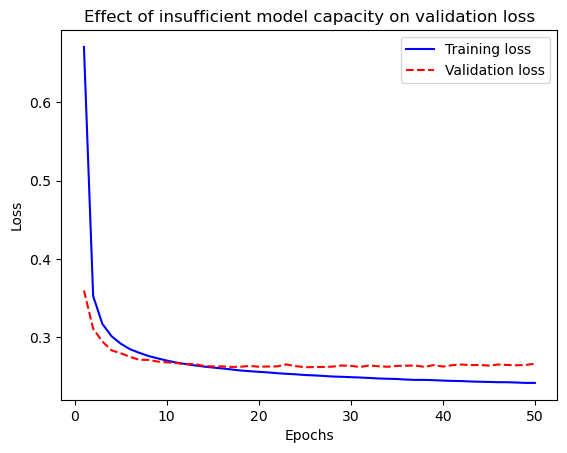

In [16]:
val_loss = history_small_model.history["val_loss"]
loss = history_small_model.history["loss"]
epochs = range(1, n_epochs+1)
plt.plot(epochs, loss, "b-", label="Training loss")
plt.plot(epochs, val_loss, "r--", label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

If we can’t overfit, it’s likely a problem with the representational power of our model. We’re going to need a bigger model, one with more capacity (able to store more information). We can increase representational power by:
- adding more layers, 
- using bigger layers (layers with more parameters), 
- using kinds of layers that are more appropriate for the problem at hand (better architecture priors).

If we add two intermediate layers with 96 units each in the previous model, the problem vanishes:

In [17]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=n_epochs,
    batch_size=128,
    validation_split=0.2)

Epoch 1/50
375/375 [==============================] - 2s 3ms/step - loss: 0.3705 - accuracy: 0.8961 - val_loss: 0.1927 - val_accuracy: 0.9448
Epoch 2/50
375/375 [==============================] - 1s 3ms/step - loss: 0.1635 - accuracy: 0.9515 - val_loss: 0.1410 - val_accuracy: 0.9577
Epoch 3/50
375/375 [==============================] - 1s 3ms/step - loss: 0.1166 - accuracy: 0.9650 - val_loss: 0.1309 - val_accuracy: 0.9588
Epoch 4/50
375/375 [==============================] - 1s 3ms/step - loss: 0.0883 - accuracy: 0.9737 - val_loss: 0.1045 - val_accuracy: 0.9695
Epoch 5/50
375/375 [==============================] - 1s 3ms/step - loss: 0.0728 - accuracy: 0.9784 - val_loss: 0.0918 - val_accuracy: 0.9721
Epoch 6/50
375/375 [==============================] - 1s 3ms/step - loss: 0.0583 - accuracy: 0.9822 - val_loss: 0.0939 - val_accuracy: 0.9721
Epoch 7/50
375/375 [==============================] - 1s 3ms/step - loss: 0.0481 - accuracy: 0.9853 - val_loss: 0.0916 - val_accuracy: 0.9732
Epoch 

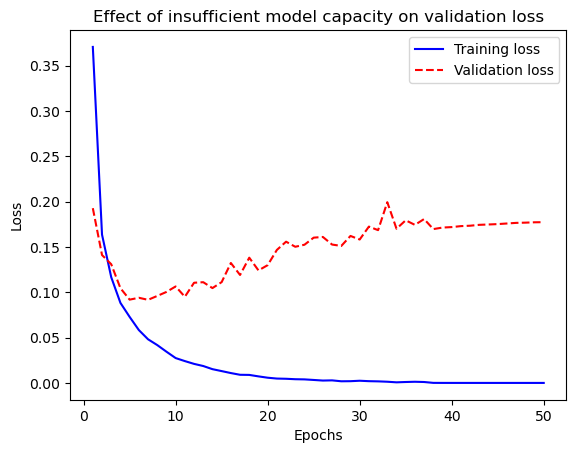

In [18]:
val_loss = history_large_model.history["val_loss"]
loss = history_large_model.history["loss"]
epochs = range(1, n_epochs+1)
plt.plot(epochs, loss, "b-", label="Training loss")
plt.plot(epochs, val_loss, "r--", label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## Improving generalization
Once our model has shown itself to have some generalization power and to be able to overfit, we can deal with maximizing generalization. To improve generalization power of model we can use the following techniques:
- dataset curation
- feature engineering
- using early stopping
- regularizing model

### Dataset curation:
- Data should make it possible to smoothly interpolate between samples. If a problem is overly noisy or discrete, deep learning will be useless.
- Make sure we have enough data: we need a dense sampling of the input-cross-output space.
- Minimize labeling errors.
- Clean our data and deal with missing values.
- If we have many features and we aren’t sure which ones are actually useful, we do feature selection.

### Feature engineering
is the process of using our own knowledge about the data and about the machine learning algorithm at hand to make the algorithm work better by applying hardcoded (non-learned) transformations to the data before it goes into the model. The data needs to be presented to the model in a way that will make the model’s job easier.

<img src=5.png/>

If we choose to use the raw pixels of the image as input data, we have a difficult machine learning problem, demanding a convolutional neural network to solve it. If we use polar coordinates with regard to the center of the image our input will become the angle theta of each clock hand. At this point, our features are making the problem so easy that no machine learning is required.

Before deep learning, feature engineering was the most important part of the machine learning workflow, because classical shallow algorithms didn’t have hypothesis spaces rich enough to learn useful features by themselves. The way we presented the data to the algorithm was absolutely critical to its success.

Although modern deep learning removes the need for most feature engineering, because neural networks are capable of automatically extracting useful features from raw data, we still need to consider feature engineering due to:
- Good features allow us to solve problems more elegantly while using fewer resources. 
- Good features let us solve a problem with far less data.

### Using early stopping
We never fully fit a deep learning model. Such a fit wouldn’t generalize at all. We will always interrupt training long before we’ve reached the minimum possible training loss. Finding the exact point during training where we’ve reached the most generalizable fit is one of the most effective ways to improve generalization. This aim can be executed by:
- training our models for longer than needed to figure out the number of epochs that yielded the best validation metrics, and then we would retrain a new model for exactly that number of epochs (however, it requires us to do redundant work, which can sometimes be expensive);
- saving model at the end of each epoch, and once we’ve found the best epoch, reuse the closest saved model;
- using EarlyStopping callback in Keras that will interrupt training as soon as validation metrics have stopped improving, while remembering the best known model state.

### Regularizing model
Regularization techniques are a set of best practices that actively impede the model’s ability to fit perfectly to the training data, with the goal of making the model perform better during validation. The most common regularization techniques are as follows:
- REDUCING THE NETWORK’S SIZE
- ADDING WEIGHT REGULARIZATION
- ADDING DROPOUT

#### REDUCING THE NETWORK’S SIZE
The simplest way to mitigate overfitting is to reduce the size of the model (the number of learnable parameters in the model, determined by the number of layers and the number of units per layer).  At the same time, keep in mind that we should use models that have enough parameters that they don’t underfit. There is no magical formula to determine the right number of layers or the right size for each layer.  The general workflow for finding an appropriate model size is to start with relatively few layers and parameters, and increase the size of the layers or add new layers until we see diminishing returns with regard to validation loss. We’ll know our model is too large if it starts overfitting right away and if its validation loss curve looks choppy with high-variance.

In [19]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 41ms/step - loss: 0.5322 - accuracy: 0.7869 - val_loss: 0.4130 - val_accuracy: 0.8536
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.3369 - accuracy: 0.8879 - val_loss: 0.3388 - val_accuracy: 0.8671
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2523 - accuracy: 0.9141 - val_loss: 0.2888 - val_accuracy: 0.8886
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2040 - accuracy: 0.9297 - val_loss: 0.2753 - val_accuracy: 0.8901
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1730 - accuracy: 0.9402 - val_loss: 0.2748 - val_accuracy: 0.8885
Epoch 6/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1485 - accuracy: 0.9511 - val_loss: 0.3076 - val_accuracy: 0.8782
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1276 - accuracy: 0.9585 - val_loss: 0.2960 - val_accuracy: 0.8836
Epoch 8/20
30

In [20]:
#Version of the model with lower capacity
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 33ms/step - loss: 0.5548 - accuracy: 0.7647 - val_loss: 0.4539 - val_accuracy: 0.8446
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.3831 - accuracy: 0.8849 - val_loss: 0.3633 - val_accuracy: 0.8783
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.3037 - accuracy: 0.9059 - val_loss: 0.3205 - val_accuracy: 0.8849
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2522 - accuracy: 0.9221 - val_loss: 0.2981 - val_accuracy: 0.8874
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2160 - accuracy: 0.9343 - val_loss: 0.2846 - val_accuracy: 0.8901
Epoch 6/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1878 - accuracy: 0.9433 - val_loss: 0.2788 - val_accuracy: 0.8908
Epoch 7/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1655 - accuracy: 0.9507 - val_loss: 0.2867 - val_accuracy: 0.8851
Epoch 8/20
30/3

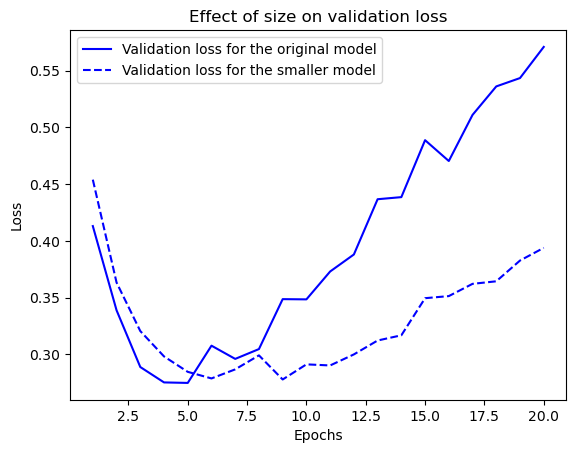

In [21]:
epochs = range(1, 21)
plt.plot(epochs, history_original.history["val_loss"], "b-",
         label="Validation loss for the original model")
plt.plot(epochs, history_smaller_model.history["val_loss"], "b--",
         label="Validation loss for the smaller model")
plt.title("Effect of size on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [22]:
# Version of the model with higher capacity
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 8s 198ms/step - loss: 0.5723 - accuracy: 0.7287 - val_loss: 0.3531 - val_accuracy: 0.8684
Epoch 2/20
30/30 [==============================] - 4s 126ms/step - loss: 0.3138 - accuracy: 0.8731 - val_loss: 0.2812 - val_accuracy: 0.8856
Epoch 3/20
30/30 [==============================] - 3s 117ms/step - loss: 0.2464 - accuracy: 0.9015 - val_loss: 0.2835 - val_accuracy: 0.8834
Epoch 4/20
30/30 [==============================] - 3s 114ms/step - loss: 0.1883 - accuracy: 0.9255 - val_loss: 0.3218 - val_accuracy: 0.8771
Epoch 5/20
30/30 [==============================] - 4s 134ms/step - loss: 0.1395 - accuracy: 0.9464 - val_loss: 0.4173 - val_accuracy: 0.8555
Epoch 6/20
30/30 [==============================] - 4s 135ms/step - loss: 0.1084 - accuracy: 0.9601 - val_loss: 0.4061 - val_accuracy: 0.8642
Epoch 7/20
30/30 [==============================] - 3s 115ms/step - loss: 0.1004 - accuracy: 0.9658 - val_loss: 0.3274 - val_accuracy: 0.8824
Epoch 

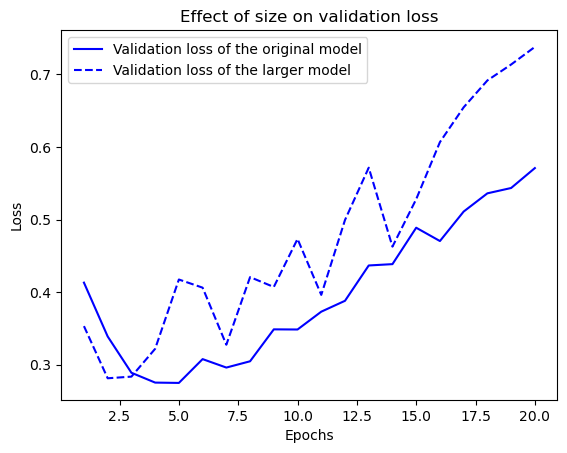

In [23]:
epochs = range(1, 21)
plt.plot(epochs, history_original.history["val_loss"], "b-",
         label="Validation loss of the original model")
plt.plot(epochs, history_larger_model.history["val_loss"], "b--",
         label="Validation loss of the larger model")
plt.title("Effect of size on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

#### ADDING WEIGHT REGULARIZATION
is a way to mitigate overfitting by putting constraints on the complexity of a model by forcing its weights to take only small values, which makes the distribution of weight values more regular. It’s done by adding to the loss function of the model a cost associated with having large weights:
- L1 regularization—The cost added is proportional to the absolute value of the weight coefficients.
- L2 regularization—The cost added is proportional to the square of the value of the weight coefficients.

In Keras, weight regularization is added by passing weight regularizer instances to layers as keyword arguments. For instance, we can add L2 weight regularization to the previous model as follows. In this code, `l2(0.002)` means every coefficient in the weight matrix of the layer will add `0.002 * weight_coefficient_value ** 2` to the total loss of the model

In [24]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 6s 106ms/step - loss: 0.6298 - accuracy: 0.7629 - val_loss: 0.4890 - val_accuracy: 0.8633
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.4210 - accuracy: 0.8874 - val_loss: 0.4011 - val_accuracy: 0.8779
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3395 - accuracy: 0.9096 - val_loss: 0.3672 - val_accuracy: 0.8865
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2992 - accuracy: 0.9236 - val_loss: 0.3612 - val_accuracy: 0.8838
Epoch 5/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2760 - accuracy: 0.9298 - val_loss: 0.3562 - val_accuracy: 0.8844
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2630 - accuracy: 0.9355 - val_loss: 0.3566 - val_accuracy: 0.8856
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2483 - accuracy: 0.9418 - val_loss: 0.3637 - val_accuracy: 0.8824
Epoch 8/20
3

We can see that the model with L2 regularization has become much more resistant to overfitting than the reference model:

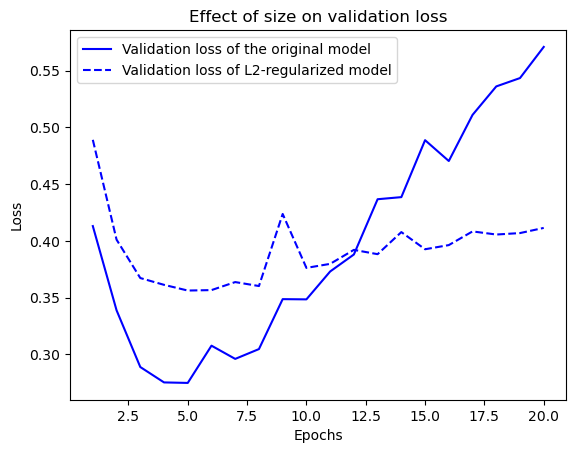

In [25]:
epochs = range(1, 21)
plt.plot(epochs, history_original.history["val_loss"], "b-",
         label="Validation loss of the original model")
plt.plot(epochs, history_l2_reg.history["val_loss"], "b--",
         label="Validation loss of L2-regularized model")
plt.title("Effect of size on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

Apart from L1 and L2 regularizers we can also add simultaneous L1 and L2 regularization:

```python
from tensorflow.keras import regularizers
regularizers.l1_l2(l1=0.001, l2=0.001) 
```

#### ADDING DROPOUT
Weight regularization is more typically used for smaller deep learning models. Large deep learning models tend to be so overparameterized that imposing constraints on weight values hasn’t much impact on model capacity and generalization. In such cases dropout is preferred. Dropout is one of the most effective and most commonly used regularization techniques for neural networks. Dropout, applied to a layer, consists of randomly dropping out (setting to zero) a number of output features of the layer during training. Let’s say a given layer would normally return a vector `[0.2, 0.5, 1.3, 0.8, 1.1]` for a given input sample during training. After applying dropout, this vector will have a few zero entries distributed at random: for example, `[0, 0.5, 1.3, 0, 1.1]`. The dropout rate is the fraction of the features that are zeroed out; it’s usually set between 0.2 and 0.5. At test time, no units are dropped out; instead, the layer’s output values are scaled down by a factor equal to the dropout rate, to balance for the fact that more units are active than at training time.

In Keras, we can introduce dropout in a model via the Dropout layer, which is applied to the output of the layer right before it.

In [26]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 4s 64ms/step - loss: 0.6581 - accuracy: 0.5955 - val_loss: 0.6056 - val_accuracy: 0.6933
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.5804 - accuracy: 0.7263 - val_loss: 0.5275 - val_accuracy: 0.8567
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.5177 - accuracy: 0.7627 - val_loss: 0.4596 - val_accuracy: 0.8678
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.4640 - accuracy: 0.8238 - val_loss: 0.4323 - val_accuracy: 0.8526
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.4143 - accuracy: 0.8636 - val_loss: 0.3679 - val_accuracy: 0.8825
Epoch 6/20
30/30 [==============================] - 1s 27ms/step - loss: 0.3797 - accuracy: 0.8866 - val_loss: 0.3414 - val_accuracy: 0.8826
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3470 - accuracy: 0.9053 - val_loss: 0.3333 - val_accuracy: 0.8835
Epoch 8/20
30

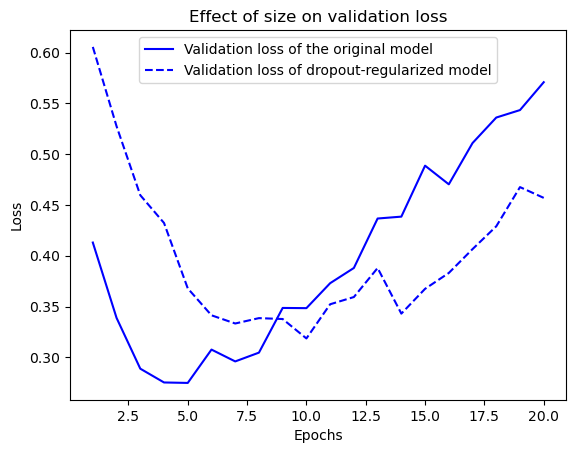

In [27]:
epochs = range(1, 21)
plt.plot(epochs, history_original.history["val_loss"], "b-",
         label="Validation loss of the original model")
plt.plot(epochs, history_dropout.history["val_loss"], "b--",
         label="Validation loss of dropout-regularized model")
plt.title("Effect of size on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()